<img src="https://www.medicaldevice-network.com/wp-content/uploads/sites/23/2021/02/shutterstock_1364662745.jpg" width="1800">

**Project objective:**

The objective of this project is to develop a robust machine learning model capable of predicting the likelihood of an individual having a specific disease based on their health-related attributes. By leveraging a comprehensive dataset that includes various physiological measurements and biomarkers, the model aims to classify individuals into diseased or non-diseased categories. This predictive tool will assist healthcare providers in early disease detection and management, potentially improving patient outcomes and reducing healthcare costs.

# **Step 1 | Import Libraries**


In [9]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Your code here


# **Step 2 | Read Dataset**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

First of all, let's load the dataset:

In [14]:
# Read dataset
train_data = pd.read_csv('/workspaces/tugasDm/Blood_samples_dataset_balanced_2(f).csv')
test_data = pd.read_csv('/workspaces/tugasDm/blood_samples_dataset_test.csv')

In [13]:
import os

# Print the current working directory
print(os.getcwd())


/workspaces/tugasDm


In [15]:
# combine datasets
df = pd.concat([train_data, test_data], ignore_index=True)
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


**Dataset:**

The dataset comprises multiple health-related attributes collected from individuals. These attributes include:

* **Glucose:** Blood sugar level (mg/dL)
* **Cholesterol:** Level of cholesterol in the blood (mg/dL)
* **Hemoglobin:** Protein in red blood cells carrying oxygen
* **Platelets:** Blood cells aiding in clotting
* **White Blood Cells (WBC):** Immune system cells fighting infections
* **Red Blood Cells (RBC):** Cells carrying oxygen
* **Hematocrit:** Percentage of blood volume occupied by RBC
* **Mean Corpuscular Volume (MCV):** Average volume of RBC
* **Mean Corpuscular Hemoglobin (MCH):** Average amount of hemoglobin in RBC
* **Mean Corpuscular Hemoglobin Concentration (MCHC):** Average concentration of hemoglobin in RBC
* **Insulin:** Hormone regulating blood sugar levels
* **BMI (Body Mass Index):** Measure of body fat based on height and weight
* **Systolic Blood Pressure (SBP):** Pressure in arteries during heartbeats
* **Diastolic Blood Pressure (DBP):** Pressure in arteries at rest between beats
* **Triglycerides:** Type of fat found in blood (mg/dL)
* **HbA1c (Glycated Hemoglobin):** Measure of average blood sugar levels over past 2-3 months
* **LDL (Low-Density Lipoprotein) Cholesterol:** "Bad" cholesterol
* **HDL (High-Density Lipoprotein) Cholesterol:** "Good" cholesterol
* **ALT (Alanine Aminotransferase):** Liver enzyme
* **AST (Aspartate Aminotransferase):** Enzyme found in liver and heart
* **Heart Rate:** Number of heartbeats per minute (bpm)
* **Creatinine:** Waste product produced by muscles and filtered by kidneys
* **Troponin:** Protein released into bloodstream during heart muscle damage
* **C-reactive Protein (CRP):** Marker of inflammation in the body
* **Disease:** Binary indicator (1: Diseased, 0: Non-diseased)

# **Step 3 | Dataset Overview**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
Next, I'll delve into a detailed exploration of the dataset:

## **Step 3.1 | Dataset Basic Information**

In [16]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

**Inferences:**

* **Number of Entries:** The dataset consists of **2837**, ranging from index 0 to 2836.
    
    
* **Columns:** There are **25 columns** in the dataset corresponding to various attributes of the patients and results of tests.
    
    
* **Datatypes:**
    - Most of the columns (24 out of 25) are of the **float64** data type.
    - Only the Disease column is of the object data type.
    
    
* **Missing Values:** There don't appear to be any missing values in the dataset as each column has 303 non-null entries.

## **Step 3.2 | Summary Statistics for Numerical Variables**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [17]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,2837.0,0.384621,0.262080,0.001827,0.141529,0.357817,0.596150,0.991742
Cholesterol,2837.0,0.413031,0.251023,0.003088,0.223545,0.397638,0.603341,0.999606
Hemoglobin,2837.0,0.568941,0.278908,0.000719,0.325035,0.597916,0.791215,0.997876
Platelets,2837.0,0.508157,0.301621,0.000006,0.202496,0.533962,0.771727,0.999507
White Blood Cells,2837.0,0.510863,0.279597,-0.000206,0.259467,0.527381,0.744950,0.999646
Red Blood Cells,2837.0,0.506205,0.273070,0.000552,0.258357,0.467431,0.743670,1.000000
Hematocrit,2837.0,0.506106,0.287049,0.004556,0.288132,0.493428,0.753657,1.000857
Mean Corpuscular Volume,2837.0,0.496309,0.276560,0.000309,0.287532,0.461418,0.722293,0.996362
Mean Corpuscular Hemoglobin,2837.0,0.488859,0.310724,-0.000614,0.217207,0.448926,0.778160,0.999234
Mean Corpuscular Hemoglobin Concentration,2837.0,0.551795,0.277234,0.000719,0.319725,0.583470,0.741381,0.999666


## **Step 3.3 | Summary Statistics for Categorical Variables**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [18]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,Disease
count,2837
unique,6
top,Diabetes
freq,834


**Categorical Features:**

* **`Disease`**: There are 6 unique values, with Diabetes being the most frequent category, occurring 834 times out of 2837 entries.

# **Step 4 | EDA**

In our Exploratory Data Analysis (EDA), we'll proceed in two primary phases:

1. **Univariate Analysis**: During this stage, our attention will be directed towards examining each feature independently to grasp its distribution and scope.

2. **Multivariate Analysis**: In this phase, we'll delve into the connection between all features together excluding the target. This exploration aids in understanding the significance and impact of each feature on predicting the target outcome.

Through these sequential steps, our objective is to gain insights into the distinctive attributes of the data as well as how each feature contributes to our overarching goal: **predicting the target variable**.

## **Step 4.1 | Univariate Analysis**

We conduct univariate analysis on the dataset's features, distinguishing between their respective data types:

* For **continuous data**: We utilize density plot to illuminate the distribution of each feature. This enables us to grasp the central tendency, dispersion, and form of the dataset's distribution.

* For **categorical data**: Count plots are employed to depict the frequency of each category. This offers a concise portrayal of the prevalence of each category within its corresponding feature.

By leveraging these visualization methods, we enhance our comprehension of the distinct attributes associated with each feature in the dataset.

### **Step 4.1.1 | Numerical Variables Univariate Analysis**

In [19]:
# Filter out continuous features for the univariate analysis
df_continuous = df.iloc[:, :-1]

/tmp/ipykernel_5699/3768790144.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_continuous[col], ax = axes[i])
/tmp/ipykernel_5699/3768790144.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_continuous[col], ax = axes[i])
/tmp/ipykernel_5699/3768790144.py:8: UserWarning: 

`distplot`

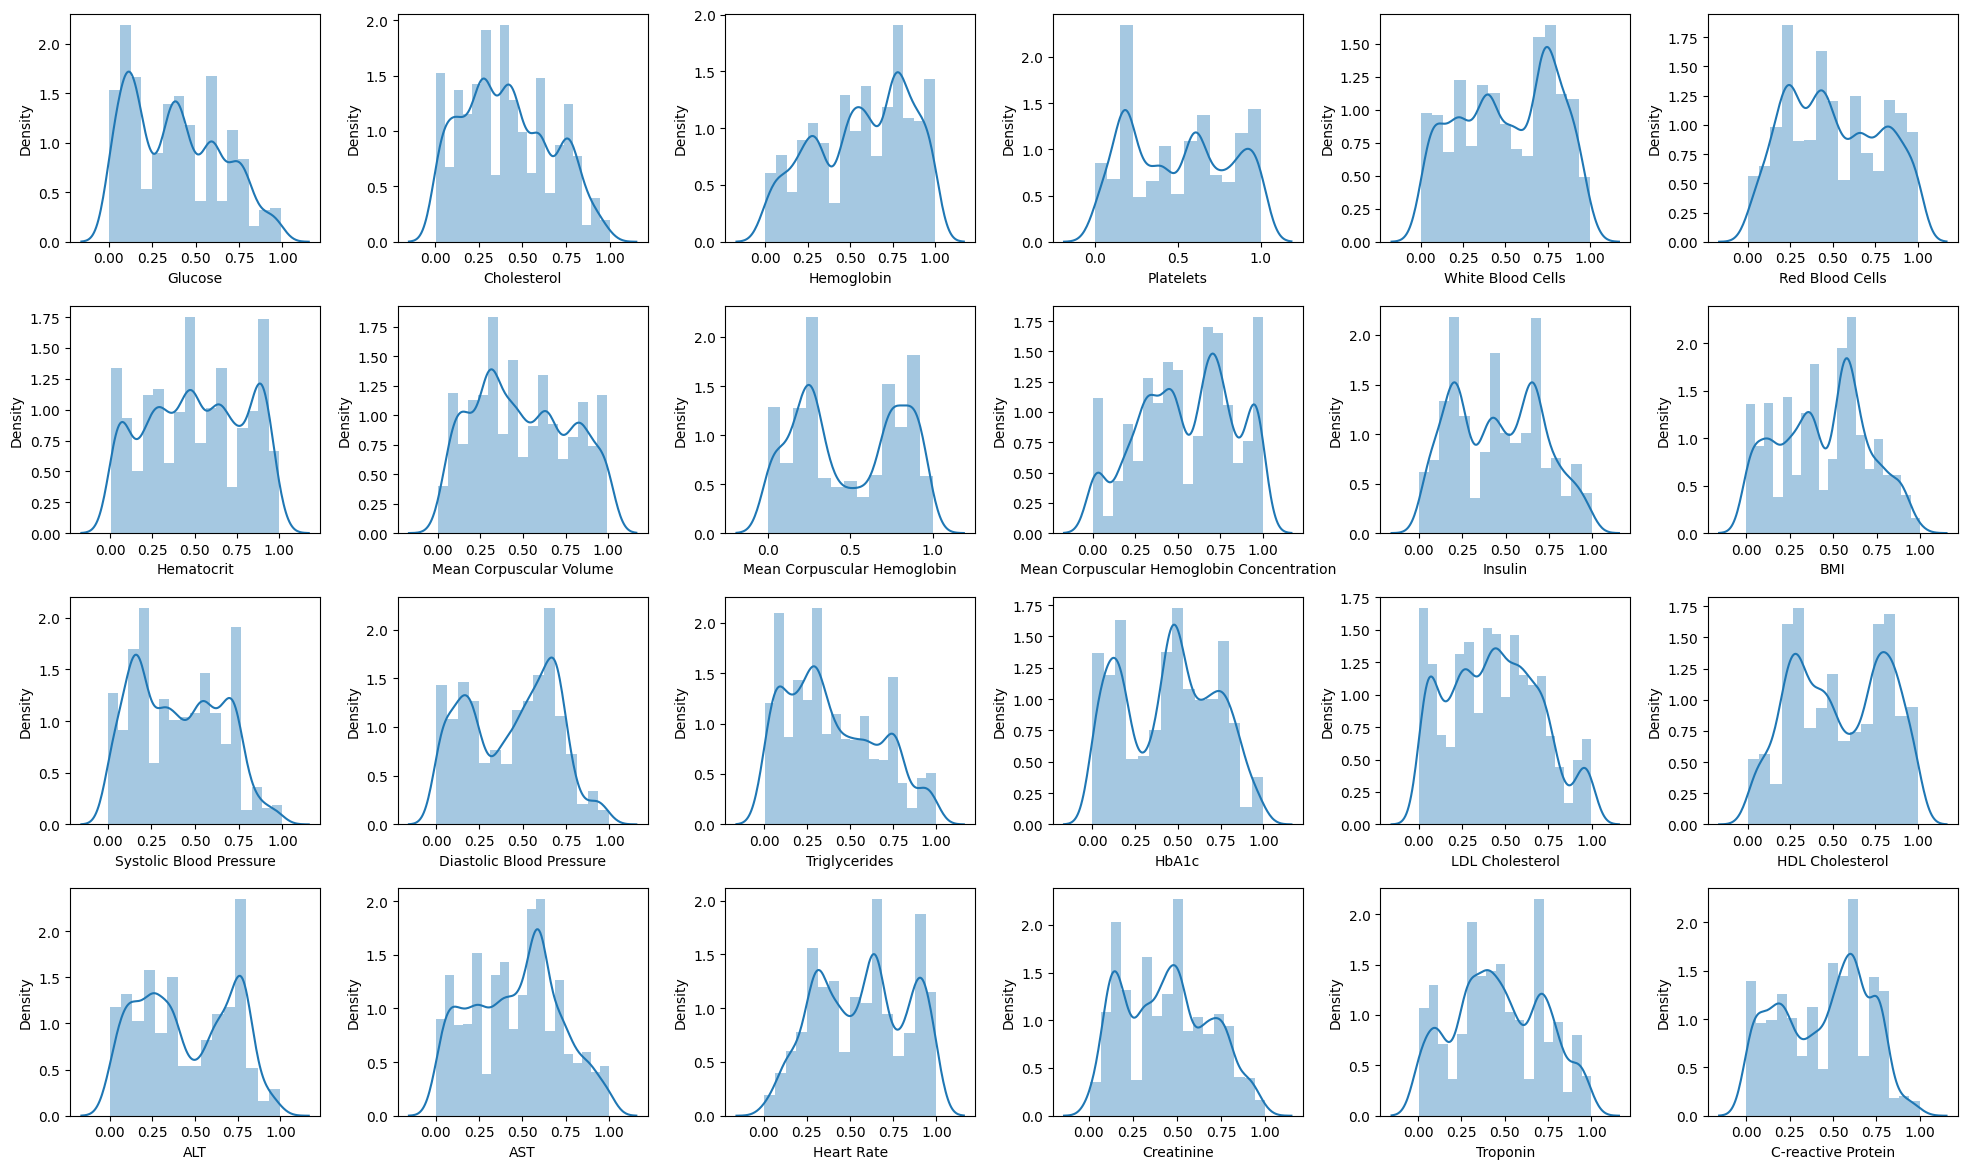

In [20]:
# Set up the subplot
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 12))
fig.tight_layout(pad=2.5)

axes = axes.flatten()

for i, col in enumerate(df_continuous.columns):
  sns.distplot(df_continuous[col], ax = axes[i])

plt.show()

Upon reviewing the density plots of the continuous features and cross-referencing them with the provided feature descriptions, everything appears consistent and within expected ranges. __There doesn't seem to be any noticeable noise or implausible values among the continuous variables.__

### **Step 4.1.2 | Categorical Variables Univariate Analysis**

/tmp/ipykernel_5699/3670151817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Disease'], data=df, palette="viridis")


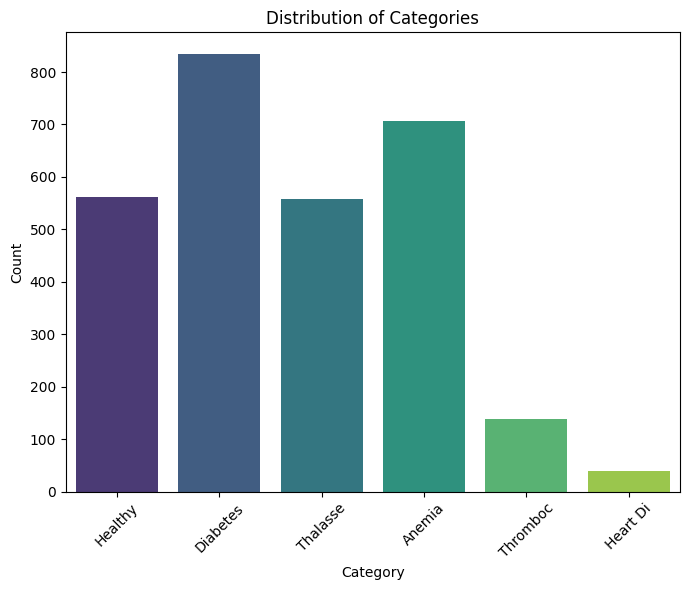

In [22]:
plt.figure(figsize=(7, 6))
sns.countplot(x=df['Disease'], data=df, palette="viridis")

# Customize plot appearance
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()

The countplot of Disease feature reveals that **`Diabetes`** disease is the most prevalent, followed by **`Anemia`** disease and **`Healthy`** people. Diseases **`Thalasse`**, **`Thromboc`**, and **`Heart Di`** are relatively less common. This distribution suggests that **`Diabetes`** disease is the dominant category in the dataset, with a significantly higher frequency compared to other categories.

## **Step 4.2 | Multivariate Analysis**

For our __Multivariate analysis__ on the dataset's features:

We will create a **correlation matrix** to detect the correlation between all variables except the target and determine whether there is a high correlation between some features so that we can limit the number of features.

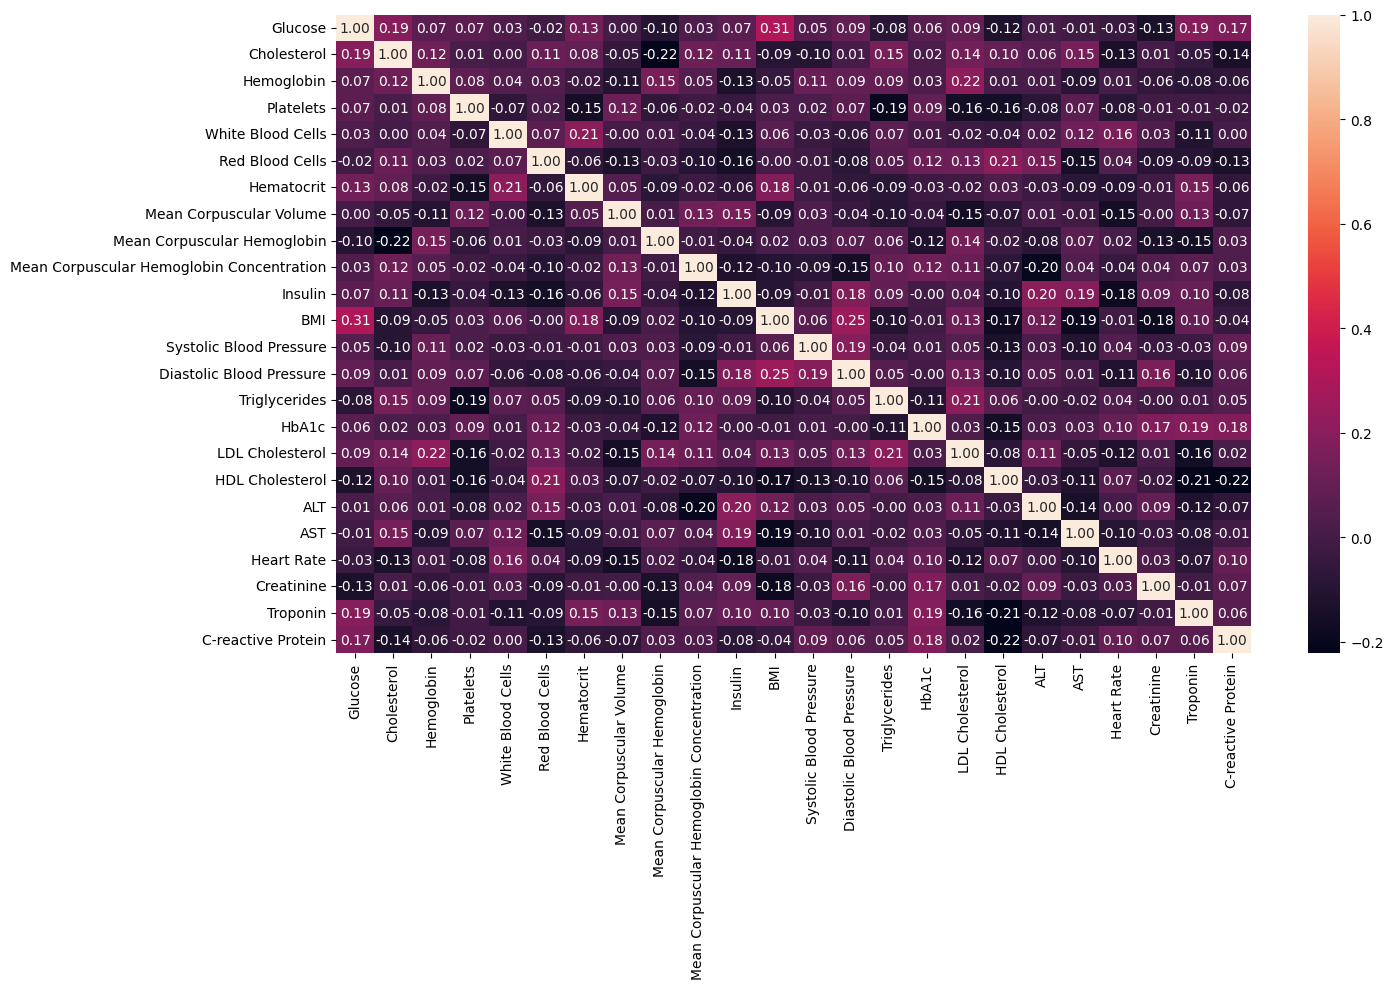

In [23]:
plt.figure(figsize=(15,10))

sns.heatmap(df_continuous.corr(), annot=True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [24]:
# Check for high correlations

high_correlation_found = False

features = df_continuous.columns
for feature1 in features:
  for feature2 in features:
    if feature1 != feature2:
      corr = df_continuous.corr().loc[feature1, feature2]
      if corr > 0.5 or corr < -0.5:
        print(f"Correlation coefficient between {feature1} and {feature2}: {corr}")
        high_correlation_found = True

if not high_correlation_found:
    print("No high correlation is found.")

No high correlation is found.


**Inference:**

Upon analyzing the correlation matrix of the continuous features in our dataset, we observe that no pairs of features exhibit a high correlation coefficient (greater than 0.5 or less than -0.5). This indicates that there are no strong linear relationships between any of the continuous variables

# **Step 5 | Data Preprocessing**

## **Step 5.1 | Irrelevant Features Removal**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

All features in the dataset appear to be relevant based on our __EDA__. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost, especially given the dataset's small size.

## **Step 5.2 | Missing Value Treatment**

In [25]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

 Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

## **Step 5.3 | Duplicated Values Treatment**

In [26]:
df.duplicated().sum()

2286

In [27]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [28]:
df.shape

(551, 25)

Upon our above inspection, we found that there were about **2286** duplicated records in our dataset. We addressed this issue by dropping the duplicates. This is ideal as it helps to ensure the integrity of our data by eliminating redundant entries, thus providing a more accurate analysis

## **Step 5.4 | Outlier Treatment**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

In [29]:
continuous_features = df_continuous.columns.to_list()

In [30]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

Upon identifying outliers for the specified continuous features, we found the following:

**There are no outliers detected in this data**

## **Step 5.5 | Disease Feature Encoding**

In [31]:
# Convert target to numerical values
df.Disease = [0 if value == "Healthy" else 1 for value in df.Disease]

df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,1
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,1
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,1
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,1
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,1


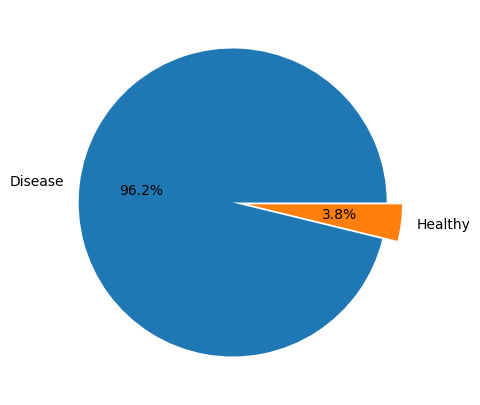

In [32]:
plt.figure(figsize = (5,5))

labels = ['Disease','Healthy']
explode = [0, 0.1]

plt.pie(df.Disease.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

The chart drawn clearly indicates a **class imbalance**, which, if not addressed, can lead to significant issues in model performance. This imbalance will likely cause the model to be biased towards the majority class, resulting in poor recognition of the minority class and unreliable predictions. Therefore, it's crucial to implement strategies to mitigate this imbalance to ensure the model's accuracy and robustness across all classes.

## **Step 5.6 | Oversampling disease feature using SMOTE**

In [33]:
# updating numerical data

df_continuous = df.drop('Disease', axis=1)
df_continuous.shape

(551, 24)

In [34]:
smote = SMOTE(random_state=43)
x_resampled, y_resampled = smote.fit_resample(df_continuous, df['Disease'])

In [35]:
print("shape of resampled x:", x_resampled.shape)
print("shape of resampled y:", y_resampled.shape)

shape of resampled x: (1060, 24)
shape of resampled y: (1060,)


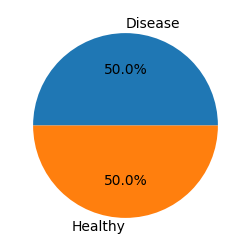

In [36]:
plt.figure(figsize = (3,3))

labels = ['Disease','Healthy']
explode = [0, 0.1]

plt.pie(y_resampled.value_counts(), labels = labels, autopct = '%1.1f%%')

plt.show()

As we see we resolved the imbalance issue using oversampling with smote, making the two classes **equal**

## **Step 5.7 | Splitting the data into train and test sets**

In [37]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [38]:
print(f"Shape of x-train: {x_train.shape} | Shape of y-train: {y_train.shape}")
print(f"Shape of x-test: {x_test.shape} | Shape of y-test: {y_test.shape}")

Shape of x-train: (848, 24) | Shape of y-train: (848,)
Shape of x-test: (212, 24) | Shape of y-test: (212,)


# **Step 6 | Building Models**

let's first build a logistic regression model

## **Step 6.1 | Building Logistic Regression Model**

### **Step 6.1.1 | Training the model**

In [39]:
l_reg_model = LogisticRegression()
l_reg_model.fit(x_train, y_train)

LogisticRegression()

### **Step 6.1.2 | Evaluating the model**

In [40]:
yreg_pred_train = l_reg_model.predict(x_train)

l_reg_accuracy_train = accuracy_score(y_train, yreg_pred_train)
print(f"Train Accuracy: {round(l_reg_accuracy_train * 100,2)}%")

yreg_pred_test = l_reg_model.predict(x_test)

l_reg_accuracy_test = accuracy_score(y_test, yreg_pred_test)
print(f"Test Accuracy: {round(l_reg_accuracy_test * 100,2)}%")

Train Accuracy: 91.27%
Test Accuracy: 91.51%


In [41]:
print("Classification Report:")
print(classification_report(y_test, yreg_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       115
           1       0.96      0.85      0.90        97

    accuracy                           0.92       212
   macro avg       0.92      0.91      0.91       212
weighted avg       0.92      0.92      0.91       212



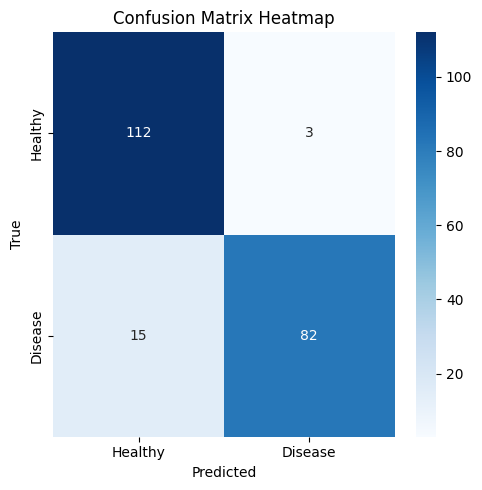

In [42]:
conf_matrix = confusion_matrix(y_test, yreg_pred_test)

plt.figure(figsize=(5, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy','Disease'], yticklabels=['Healthy','Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()

now, let's try building a random forest model

## **Step 6.2 | Building Random Forest Model**

### **Step 6.2.1 | Training the model**

In [43]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

### **Step 6.1.2 | Evaluating the model**

In [44]:
yrf_pred_train = rf_model.predict(x_train)

rf_accuracy_train = accuracy_score(y_train, yrf_pred_train)
print(f"Train Accuracy: {round(rf_accuracy_train * 100,2)}%")

yrf_pred_test = rf_model.predict(x_test)

rf_accuracy_test = accuracy_score(y_test, yrf_pred_test)
print(f"Test Accuracy: {round(rf_accuracy_test * 100,2)}%")

Train Accuracy: 100.0%
Test Accuracy: 100.0%


In [45]:
print("Classification Report:")
print(classification_report(y_test, yrf_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        97

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



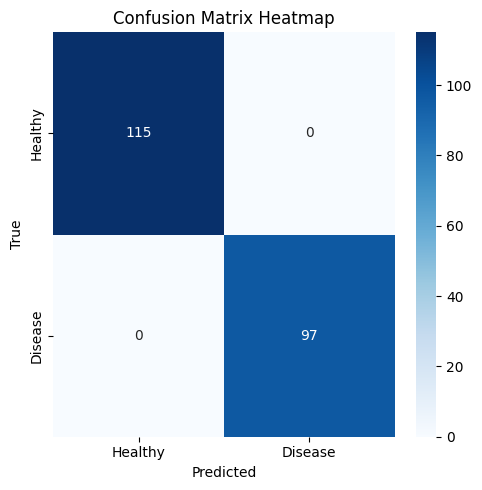

In [46]:
conf_matrix = confusion_matrix(y_test, yrf_pred_test)

plt.figure(figsize=(5, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy','Disease'], yticklabels=['Healthy','Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()

# **Step 7 | Conclusion**

In the critical context of disease diagnosis, our primary objective is to ensure a high recall for the positive class. Accurately identifying every potential case is paramount, as even one missed diagnosis could have serious consequences. However, while striving for this high recall, it is essential to maintain balanced performance to avoid unnecessary medical interventions for healthy individuals. Therefore, our models will be evaluated against these vital medical benchmarks to achieve both comprehensive detection and judicious intervention.

In [47]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Random Forest'
    ],
    'Training Accuracy Score': [
        l_reg_accuracy_train,rf_accuracy_train
    ],
    'Test Accuracy Score': [
       l_reg_accuracy_test,rf_accuracy_test
    ]
})

In [48]:
models.sort_values(by='Training Accuracy Score', ascending=False).style.background_gradient(cmap='cividis')

,Model,Training Accuracy Score,Test Accuracy Score
1,Random Forest,1.000000,1.000000
0,Logistic Regression,0.912736,0.915094


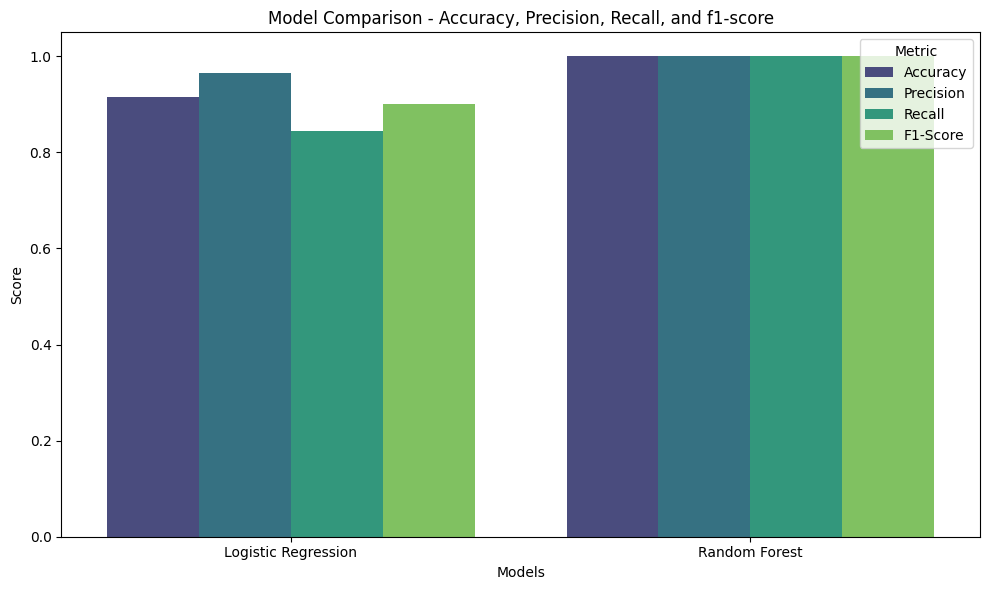

In [49]:
model_names = ['Logistic Regression', 'Random Forest']

accuracies = [l_reg_accuracy_test, rf_accuracy_test]
precisions = [precision_score(y_test, yreg_pred_test), precision_score(y_test, yrf_pred_test)]
recalls = [recall_score(y_test, yreg_pred_test), recall_score(y_test, yrf_pred_test)]
f1_scores = [f1_score(y_test, yreg_pred_test), f1_score(y_test, yrf_pred_test)]

graph = pd.DataFrame({
    'Model': model_names * 4,
    'Metric': ['Accuracy'] * 2 + ['Precision'] * 2 + ['Recall'] * 2 + ['F1-Score'] * 2,
    'Score': accuracies + precisions + recalls + f1_scores
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=graph, palette='viridis')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison - Accuracy, Precision, Recall, and f1-score')

plt.tight_layout()
plt.show()

__The Random forest model demonstrates a perfect capability in recognizing potential diseases. With a recall of 1.00, it's evident that almost all patients with diseases are correctly identified. This is of paramount importance in a medical setting. However, the model's balanced performance ensures that while aiming for high recall, it doesn't compromise on precision, thereby not overburdening the system with unnecessary alerts.__



*__Best regards!__*